In [1496]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# Regression lineaire
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white , normal_ad
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import t, shapiro

import statsmodels.api as sm
# Regression logistique
from statsmodels.api import Logit
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score
from sklearn import decomposition, preprocessing, metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# k_means
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# annalyse exploratoire

In [1497]:
df = pd.read_csv('billets.csv', sep=";")

In [1498]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Il y a quelques données manquantes dans la colone " margin_low "

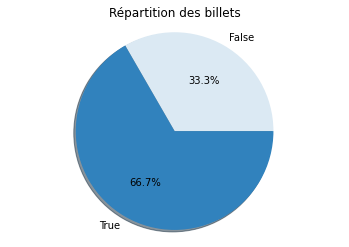

In [1499]:
# Repartition des vrais/faux billets dans notre dataset 

# Graphique:
fig1, ax1 = plt.subplots()
ax1.pie(df.groupby(["is_genuine"])["diagonal"].count(),
        labels=["False","True"],
        autopct="%1.1f%%",
        colors=["#dbe9f3","#3182bd"],
        shadow=True)
ax1.axis("equal")
plt.title("Répartition des billets")
plt.show()

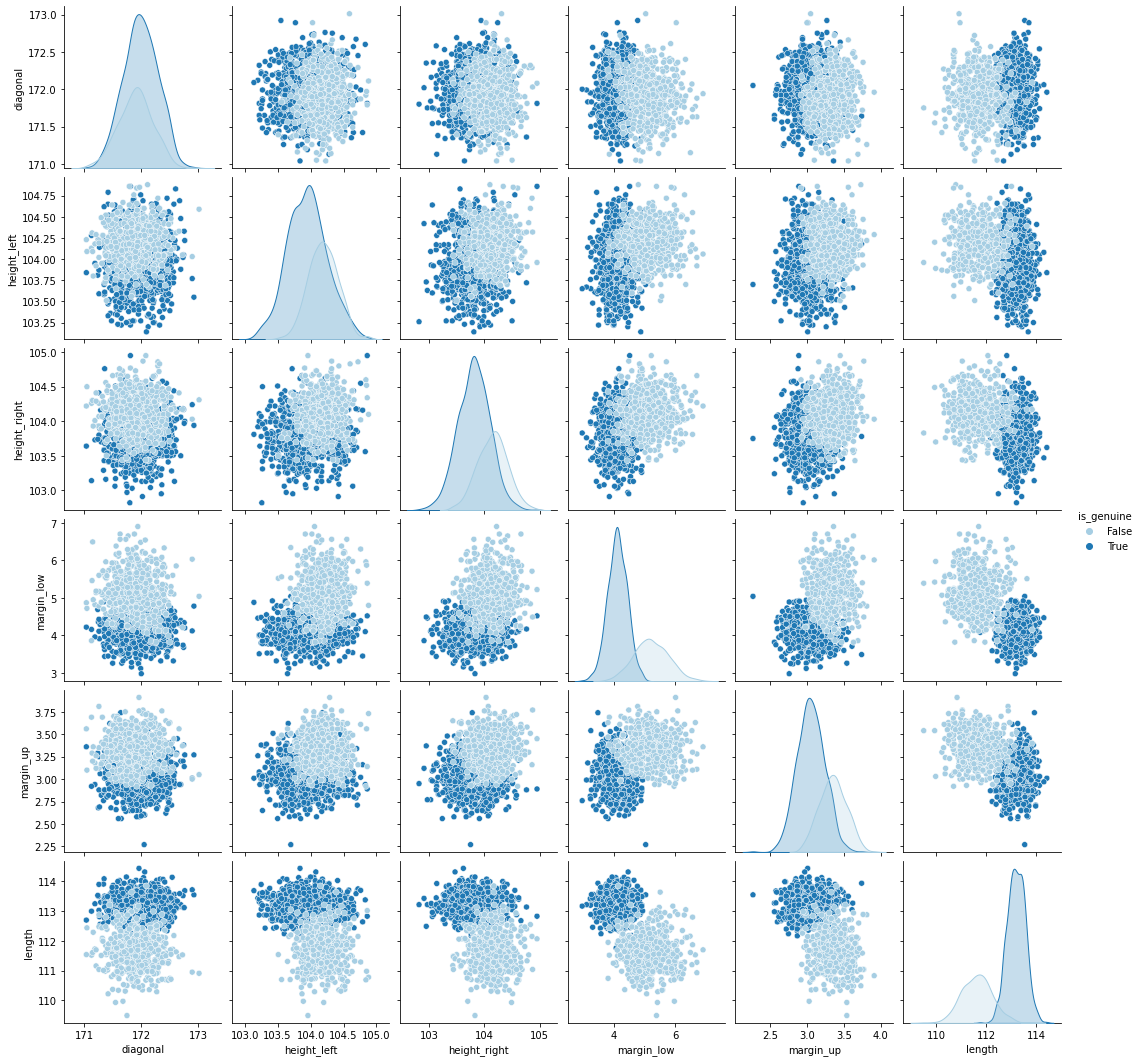

In [1500]:
# Pair plot:
sns.pairplot(df, hue="is_genuine", palette="Paired")

length et margin low sont les variables avec le plus d'impact

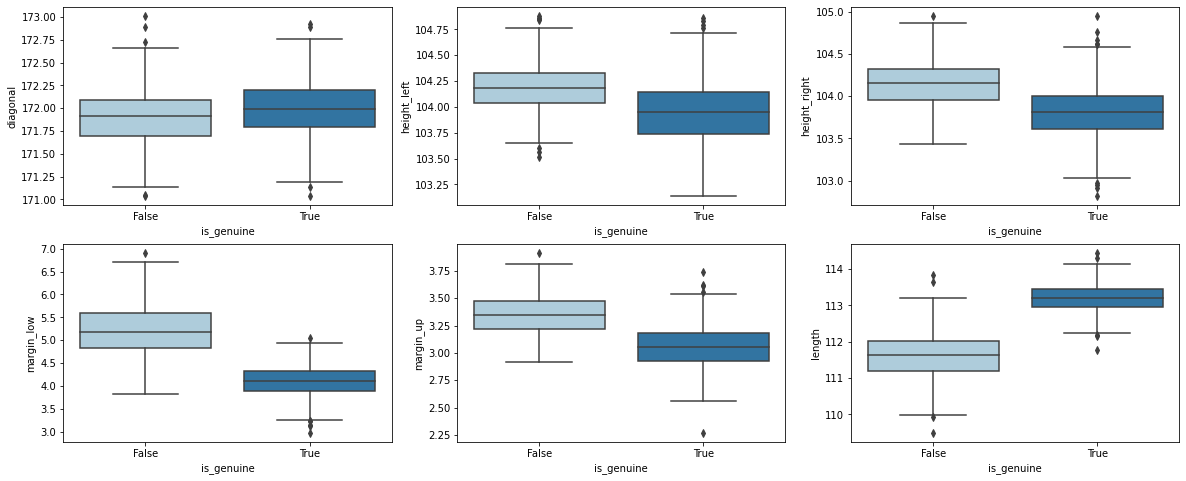

In [1501]:
a = 2  # nombre de lignes
b = 3  # nombre de colonnes
c = 1  # initialisation

fig = plt.figure(figsize=(20,8))

for i in df.loc[:, df.columns != "is_genuine"]:
    plt.subplot(a, b, c)
    #plt.title('{} (boxplot)'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x= df["is_genuine"],y = df[i], palette= "Paired")
    c = c + 1
plt.show()

Text(0.5, 1.0, 'corrélations des variables')

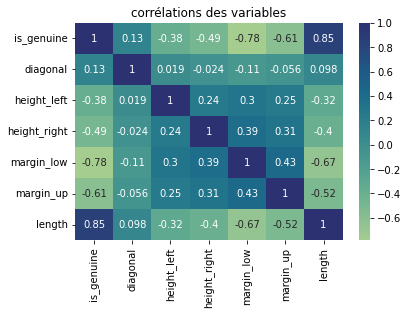

In [1502]:
# Heatmap de correlations des variables
c = sns.color_palette("crest", as_cmap=True)
sns.heatmap(df.corr(), annot=True ,cmap= c).set_title('corrélations des variables')

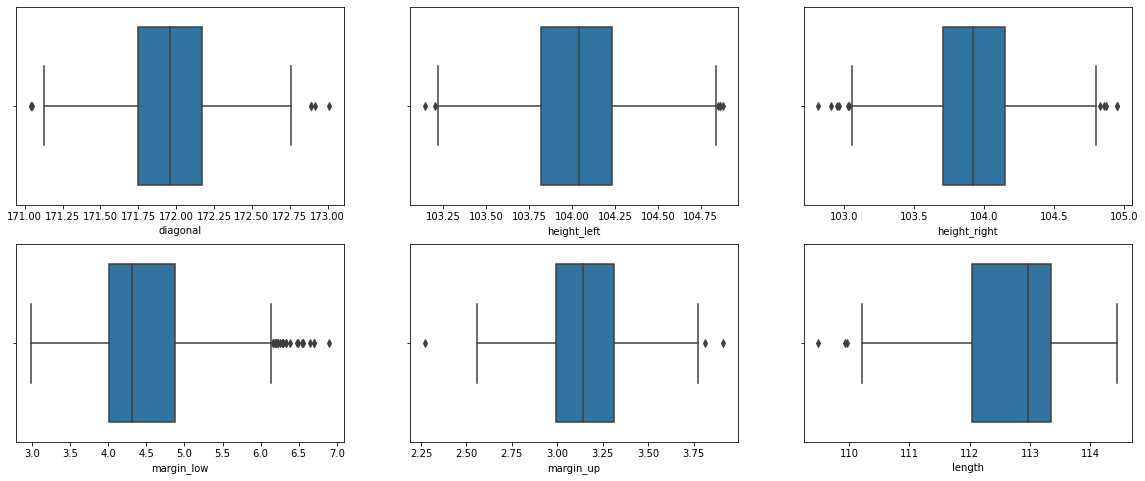

In [1503]:
# Representation graphique des outliers:
a = 2  # nombre de lignes
b = 3  # nombre de colonnes
c = 1  # initialisation

fig = plt.figure(figsize=(20,8))

for i in df.loc[:, df.columns != "is_genuine"]:
    plt.subplot(a, b, c)
    #plt.title('{} (boxplot)'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x = df[i])
    c = c + 1
plt.show()

### Regression lineaire

La régression linéaire est une méthode statistique qui permet de modéliser la relation entre une variable dite expliquée et une ou plusieurs variables dites explicatives, en supposant qu'elles sont linéairement liées. 
Il est theoriquement possible de recourir à une régression linéaire pour estimer les valeurs manquantes de "margin_low"

In [1504]:
# regression lineaire simple
Reg_Lin_simp_Train_df = df.dropna() 
Reg_Lin_simp_Test_df = df[df.isnull().any(axis=1)]

y_train_simp = Reg_Lin_simp_Train_df["margin_low"]
x_train_simp = Reg_Lin_simp_Train_df[["length"]]


In [1505]:
reg_lin = LinearRegression()
#entrainement du modèle
model_reg_lin = reg_lin.fit(x_train_simp, y_train_simp)

#Predictions:
Reg_Lin_simp_Train_df["margin_low_pred"] = reg_lin.predict(x_train_simp)
print("Intercept: %.2f" % model_reg_lin.intercept_)
print("Coéfficients:" , model_reg_lin.coef_)
y_simp= Reg_Lin_simp_Train_df["margin_low"] 
y_simp_predicted= Reg_Lin_simp_Train_df["margin_low_pred"] 

#RMSE
rmse_simp = (np.sqrt(mean_squared_error(y_simp, y_simp_predicted)))
print("RMSE= %.2f"% rmse_simp)

display(Reg_Lin_simp_Train_df[:3])

Intercept: 61.60
Coéfficients: [-0.50685746]
RMSE= 0.49


/var/folders/hj/fc4xl4ws7fx4j4_p6gr6y5480000gn/T/ipykernel_68154/110963773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reg_Lin_simp_Train_df["margin_low_pred"] = reg_lin.predict(x_train_simp)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_pred
0,True,171.81,104.86,104.95,4.52,2.89,112.83,4.407281
1,True,171.46,103.36,103.66,3.77,2.99,113.09,4.275498
2,True,172.69,104.48,103.50,4.40,2.94,113.16,4.240018


/var/folders/hj/fc4xl4ws7fx4j4_p6gr6y5480000gn/T/ipykernel_68154/4272344582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reg_Lin_simp_Train_df["residual"] = Reg_Lin_simp_Train_df["margin_low"] - Reg_Lin_simp_Train_df["margin_low_pred"]


 p-value du test d'Aderson-Darling : 3.9075068227215317e-13


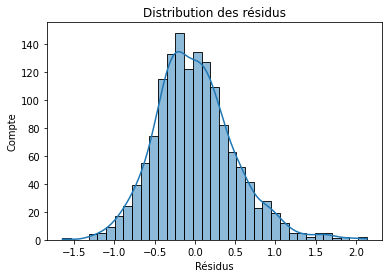

In [1506]:
#Creation d'une colonne contenant les residus:
Reg_Lin_simp_Train_df["residual"] = Reg_Lin_simp_Train_df["margin_low"] - Reg_Lin_simp_Train_df["margin_low_pred"]

print(" p-value du test d'Aderson-Darling :", normal_ad(Reg_Lin_simp_Train_df["residual"])[1])

#Graphique:
sns.histplot(Reg_Lin_simp_Train_df["residual"], kde=True)
plt.xlabel("Résidus")
plt.ylabel("Compte")
plt.title("Distribution des résidus")
plt.show()

les résidus suivent une distribution Normale.

### regression lineaire multiple

In [1507]:
#separation en 2 dataframes : l'un sans les lignes avec valeurs nulles, l'autre avec uniquement les lignes possedant une valeur nulle
Reg_Lin_Train_df = df.dropna()
Reg_Lin_Test_df = df[df.isnull().any(axis=1)]

# Creation de X_train et Y_train:
x_train = Reg_Lin_Train_df.drop(["margin_low", "is_genuine"], axis=1)
y_train = Reg_Lin_Train_df["margin_low"]

# Regression lineaire:
reg_lin = LinearRegression()
# entrainement
model_reg_lin = reg_lin.fit(x_train, y_train)

# Predictions: creation d'une colonne avec les predictions
Reg_Lin_Train_df["margin_low_pred"] = reg_lin.predict(x_train)
display(Reg_Lin_Train_df[:5])


/var/folders/hj/fc4xl4ws7fx4j4_p6gr6y5480000gn/T/ipykernel_68154/1296602903.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reg_Lin_Train_df["margin_low_pred"] = reg_lin.predict(x_train)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_pred
0,True,171.81,104.86,104.95,4.52,2.89,112.83,4.788676
1,True,171.46,103.36,103.66,3.77,2.99,113.09,4.138908
2,True,172.69,104.48,103.50,4.40,2.94,113.16,4.125933
3,True,171.36,103.91,103.94,3.62,3.01,113.51,4.156580
4,True,171.73,104.28,103.46,4.04,3.48,112.54,4.577425


In [1508]:
y = Reg_Lin_Train_df['margin_low']
y_predicted = Reg_Lin_Train_df['margin_low_pred']
print(f'Intercept : {model_reg_lin.intercept_}\n'
      f'Coéfficients: {model_reg_lin.coef_}\n'
      f'RMSE : {np.sqrt(mean_squared_error(y, y_predicted))}')

Intercept : 22.994842714447906
Coéfficients: [-0.11105978  0.18412242  0.25713805  0.2561879  -0.40910293]
RMSE : 0.4797423242719386


Intercept : Valeur  moyenne estimée de la variable depandante lorsque toutes les valeurs des variables independantes sont egales a 0.  
Coeficients : valeurs indiquant la ponderation de chaque variable, le facteur par lequel elles sont multipliées pour la prediciton.  
RMSE : 'root mean squared rerror', racine carrée de la moyenne des ecarts a la moyenne.

In [1509]:
reg_multi = smf.ols('margin_low~+height_left+diagonal+height_right+margin_up+length', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sun, 28 May 2023   Prob (F-statistic):          2.60e-202
Time:                        19:58:14   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

Méthode des moindres carrés :  
Le R² : il s'agit de la proportion de la variance de la variable dépendante qui peut être expliquée par une ou plusieurs variables indépendantes. Un R² proche de 0,50 indique que la moitié de la variation observée est expliquée par les variables explicatives.
  
Probabilité F-statistique : elle indique la signification globale de la régression en évaluant le niveau de signification de toutes les variables. L'hypothèse nulle est que tous les coefficients de régression sont égaux à zéro. Si cette probabilité est proche de 0, on rejette l'hypothèse nulle, ce qui signifie que le modèle est meilleur que celui où les coefficients seraient égaux à 0.  
  

### Analyse des residus:
Normalité de la distribution des résidus : le test omnibus a pour hypothèse nulle que les résidus sont distribués selon une loi normale. Si la valeur de la probabilité est proche de 1, cette hypothèse est vérifiée.  
Une valeur élevée pour le Jarque-Bera indique que les résidus sont distribués selon une loi normale.  
Les 2 tests donnent des resultats contradictoires.  
Utilisation du test d'Anderson-Darling pour trancher.

In [1510]:
reg_multi.resid.mean()

9.614910826960153e-14

/var/folders/hj/fc4xl4ws7fx4j4_p6gr6y5480000gn/T/ipykernel_68154/4179432547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reg_Lin_Train_df["residual"] = Reg_Lin_Train_df["margin_low"] - Reg_Lin_Train_df["margin_low_pred"]


 p-value du test d'Anderson-Darling : 5.114137678791534e-12


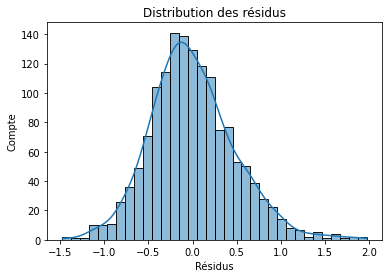

In [1511]:
# Creation d'une colonne contenant les residus:
Reg_Lin_Train_df["residual"] = Reg_Lin_Train_df["margin_low"] - Reg_Lin_Train_df["margin_low_pred"]

# Normalite:
print(" p-value du test d'Anderson-Darling :", normal_ad(Reg_Lin_Train_df["residual"])[1])

# Graphique:
sns.histplot(Reg_Lin_Train_df["residual"], kde=True)
plt.xlabel("Résidus")
plt.ylabel("Compte")
plt.title("Distribution des résidus")
plt.show()

p_value < 0.05
 l'hypothèse n'est pas rejetée puisque la p-value obtenue est inférieure a 0.05, les résidus suivent une distribution Normale.

In [1512]:
#VIF variance inflation factor
col_vif = ["diagonal","height_left","height_right", "margin_up", "length"]
Reg_Lin_Train_vif = df.dropna()
vif= pd.Series([variance_inflation_factor(Reg_Lin_Train_vif[col_vif], i)
               for i in range(len(col_vif))],
               index=col_vif)
print(f'VIF by feature:\n{vif}\n'
      f'VIF moyen: {vif.mean()}')

VIF by feature:
diagonal        170566.670778
height_left     111895.309916
height_right    100858.864433
margin_up          261.969190
length           22708.222743
dtype: float64
VIF moyen: 81258.20741161003


Il y a une forte multicolinearité entre les variables

L'homoscedasticité est le fait que la variance des erreurs de la régression est la même pour chaque observation.
Dans le cas contraire, on parle d'heteroscedasticité.

{'lm statistic': 109.86015196915031, 'lm p-value': 2.0828244985524268e-14, 'F-Statistic': 5.853731207829417, 'F-Statistic p-value': 4.974865091603998e-15}


Text(0.5, 1.0, 'Homoscedasticité')

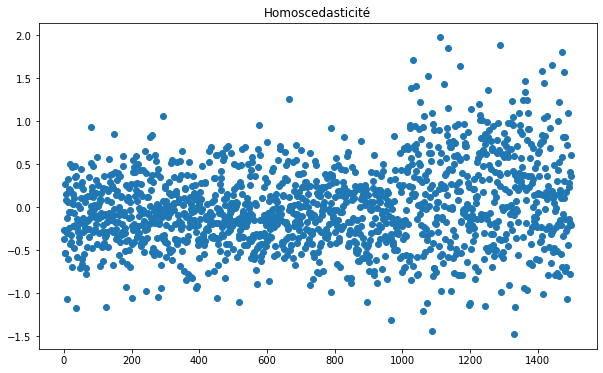

In [1513]:
# homoscedasticité
white = het_white(reg_multi.resid, reg_multi.model.exog)
white_label = ['lm statistic', 'lm p-value', 'F-Statistic', 'F-Statistic p-value']
print(dict(zip(white_label, white)))
plt.subplots(figsize=(10,6))
plt.scatter(x=Reg_Lin_Train_df.index, y = Reg_Lin_Train_df['residual'])
plt.title('Homoscedasticité')

P-value < 0.05 : il y a homoscedasticité des residus.

Le modèle de regression linéaire multiple est plus efficace :  
- Il y a homoscedasticité  
- Les residus suivent une distribution normale  
- Le RMSE est bon, et meilleur qu'avec la regression simple

### individus atypique et a forte influence

In [1514]:
# detection des individus a forte influence
alpha = 0.05
n = 1463
p = 5

analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n
print(analyses)

       obs    levier
0        1  0.016606
1        2  0.006015
2        3  0.008298
3        4  0.004467
4        5  0.005558
...    ...       ...
1458  1459  0.004307
1459  1460  0.005672
1460  1461  0.001643
1461  1462  0.002254
1462  1463  0.003324

[1463 rows x 2 columns]


In [1515]:
analyses.loc[analyses['levier'] > seuil_levier, :]


analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

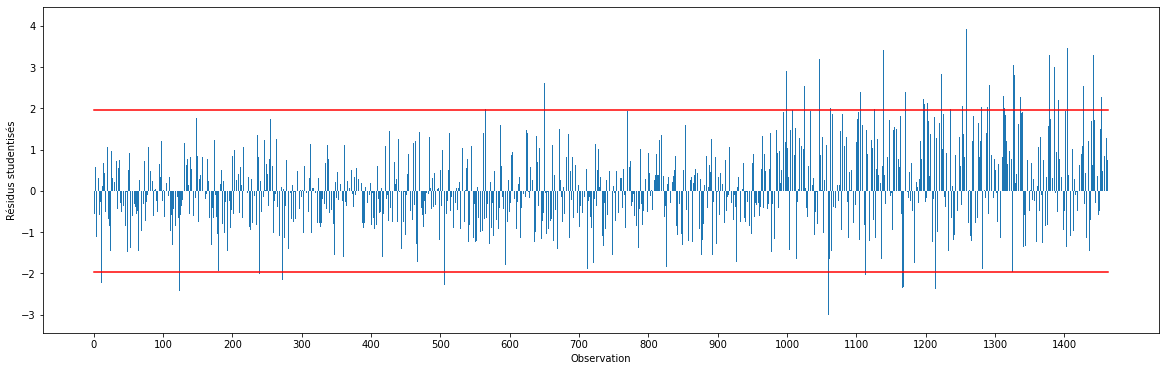

rstudent    78
dtype: int64


In [1516]:
plt.figure(figsize=(20,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1463], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1463], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

influentdf= pd.DataFrame(analyses["rstudent"] )
influentdf = influentdf.loc[abs(influentdf["rstudent"]) >(seuil_rstudent)]
print(influentdf.count())

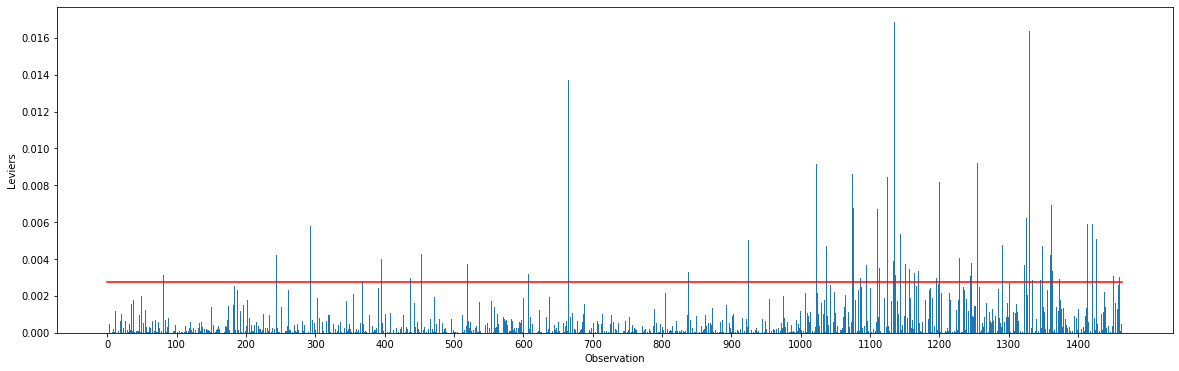

dcooks    80
dtype: int64


In [1517]:
#Calcul de la distance de cook pour identifier les valeurs atypiques
influence = reg_multi.get_influence().summary_frame()

analyses['dcooks'] = influence['cooks_d']

seuil_dcook = 4/(n-p)

plt.figure(figsize=(20,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_dcook, seuil_dcook], color='r')
plt.show()
aty = pd.DataFrame(analyses["dcooks"] >= seuil_dcook )
aty = aty.loc[aty["dcooks"] == True]

print(aty.count())

In [1518]:
#recouper les individus atypiques et influents pour identifier les individus ayant un impact sur la régression linéaire.
# Identification des individus atypiques a forte influence:
outliers_hg_lev =pd.merge(influentdf,aty, left_index=True, right_index=True)
print(outliers_hg_lev.count())
print(outliers_hg_lev)

rstudent    5
dcooks      5
dtype: int64
      rstudent  dcooks
1031 -2.510481    True
1195  2.504636    True
1291  2.564383    True
1321  2.582140    True
1441  3.280337    True


Il y a donc 5 individus atypiques et influents. On les supprime et on relance la regression pour voir le changement.

In [1519]:
# Suppression des IAI: 
Billet_sans_iai_df = df.drop(outliers_hg_lev.index)

reg_lin_c = smf.ols("margin_low~diagonal + height_left + height_right + margin_up + length", data = Billet_sans_iai_df)
model_reg_lin_b = reg_lin_c.fit()
print(model_reg_lin_b.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     268.7
Date:                Sun, 28 May 2023   Prob (F-statistic):          1.36e-203
Time:                        19:58:24   Log-Likelihood:                -983.14
No. Observations:                1458   AIC:                             1978.
Df Residuals:                    1452   BIC:                             2010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.9314      9.599      2.597   

peu de changements. Le r2 a legerement augmenté, mais de maniere negligeable.

In [1520]:
# Application du modele sur les donnees test
x_test = Reg_Lin_Test_df[["diagonal","height_left","height_right", "margin_up","length"]]
Reg_Lin_Test_df["margin_low"] = reg_lin.predict(x_test)
# Concatenation:
reg_lin_result = [Reg_Lin_Test_df, Reg_Lin_Train_df]
df = pd.concat(reg_lin_result)
df = df.drop(["margin_low_pred", "residual"], axis=1)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 72 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


/var/folders/hj/fc4xl4ws7fx4j4_p6gr6y5480000gn/T/ipykernel_68154/2323820851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reg_Lin_Test_df["margin_low"] = reg_lin.predict(x_test)


,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.483475,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659632,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


# regression logistique

In [1521]:
#y_billet : DF avec la variable dependante
#y (authenticite):
Y_billet = df.loc[:, df.columns == "is_genuine"]
print(Y_billet.value_counts())

#X (les autres):
X_billet = df.loc[:, df.columns != "is_genuine"]
X_billet = sm.tools.add_constant(X_billet)

xtrain, xtest, ytrain, ytest = train_test_split(X_billet, Y_billet, test_size = 0.3,random_state=101)
print(xtest.shape)
print(ytest.shape)
print(xtrain.shape)
print(ytrain.shape)
print(X_billet.head())

is_genuine
True          1000
False          500
dtype: int64
(450, 7)
(450, 1)
(1050, 7)
(1050, 1)
     const  diagonal  height_left  height_right  margin_low  margin_up  length
72     1.0    171.94       103.89        103.45    4.318525       3.25  112.79
99     1.0    171.93       104.07        104.18    4.393668       3.14  113.08
151    1.0    172.07       103.80        104.38    4.410457       3.02  112.93
197    1.0    171.45       103.66        103.80    4.319014       3.62  113.27
241    1.0    171.83       104.14        104.06    4.650617       3.02  112.36


In [1522]:
#Regression logistique:
#reg_log = Logit(endog=y_billet,exog=X_billet)

reg_log = sm.Logit(ytrain, xtrain).fit()


#Resume des resultats:
print(reg_log.summary2())

Optimization terminated successfully.
         Current function value: 0.029871
         Iterations 13
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: is_genuine       Pseudo R-squared: 0.953      
Date:               2023-05-28 19:58 AIC:              76.7297    
No. Observations:   1050             BIC:              111.4255   
Df Model:           6                Log-Likelihood:   -31.365    
Df Residuals:       1043             LL-Null:          -669.72    
Converged:          1.0000           LLR p-value:      1.1950e-272
No. Iterations:     13.0000          Scale:            1.0000     
------------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|    [0.025   0.975] 
------------------------------------------------------------------
const           -6.5254 269.4733 -0.0242 0.9807 -534.6833 521.6325
diagonal        -0.4883   1.2362 -0.3950 0.6928   -2

In [1523]:
# on ne garde que les variables significatives a alpha = 5%
xtrain = xtrain[["height_right","margin_low", "margin_up", "length"]]
xtrain = sm.add_constant(xtrain)

#On recommence la regression logistique:
reg_log = sm.Logit(ytrain, xtrain).fit()

#Resume des resultats:
print(reg_log.summary2())

Optimization terminated successfully.
         Current function value: 0.031631
         Iterations 12
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: is_genuine       Pseudo R-squared: 0.950      
Date:               2023-05-28 19:58 AIC:              76.4256    
No. Observations:   1050             BIC:              101.2083   
Df Model:           4                Log-Likelihood:   -33.213    
Df Residuals:       1045             LL-Null:          -669.72    
Converged:          1.0000           LLR p-value:      2.3657e-274
No. Iterations:     12.0000          Scale:            1.0000     
------------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          -295.1737 169.1697 -1.7448 0.0810 -626.7401 36.3928
height_right     -2.9528   1.2782 -2.3101 0.0209   -

conditions a remplir pour la regression logistique :  
echantillon > 500  
variables significatives ( p-value < 0.05)  
independance des observations  
mutlicolineraite ( vif)

In [1524]:
#Multicollinearite:
vif= pd.Series([variance_inflation_factor(xtrain.values, i)
               for i in range(xtrain.shape[1])],
              index=xtrain.columns)
print("VIF par features:\n", vif)
print("VIF moyen:",vif.mean())

VIF par features:
 const           189438.603228
height_right         1.272367
margin_low           1.858367
margin_up            1.467328
length               2.098844
dtype: float64
VIF moyen: 37889.06002671571


colinearité faible

In [1526]:
xtest = xtest[["height_right","margin_low", "margin_up", "length"]]
xtest = sm.add_constant(xtest)
yhat = reg_log.predict(xtest)
prediction = list(map(round, yhat))
print(ytest.loc[ytest["is_genuine"]==False].count())

is_genuine    148
dtype: int64


Text(0.5, 1.0, 'Matrice de confusion de la régression logistique\n')

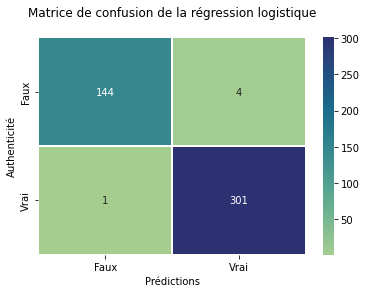

In [1527]:
#Matrice de confusion:
cm = confusion_matrix(ytest, prediction)

#Graphique:
sns.heatmap(cm,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette("crest", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["Faux","Vrai"]
            )
plt.xlabel("Prédictions")
plt.ylabel("Authenticité")
plt.title("Matrice de confusion de la régression logistique\n")

clef de lectures :  
144 vrais negatifs  
4 faux positifs  
1 faux negatifs   
301 vrais positifs

In [1528]:
xtest["proba"] = reg_log.predict(xtest)
xtest.head()

,const,height_right,margin_low,margin_up,length,proba
1043,1.0,103.80,4.94,3.27,111.33,0.000169
1280,1.0,104.22,5.33,2.94,112.26,0.025888
1266,1.0,103.98,5.68,3.18,111.55,0.000017
760,1.0,103.89,3.88,3.10,113.06,0.999715
1230,1.0,103.77,5.79,3.11,111.03,0.000002


In [1529]:
print("Accuracy:",accuracy_score(ytest, prediction))
print("Precision:",precision_score(ytest, prediction))
print("Recall:",recall_score(ytest, prediction))
print("Score F1:",f1_score(ytest, prediction))

Accuracy: 0.9888888888888889
Precision: 0.9868852459016394
Recall: 0.9966887417218543
Score F1: 0.9917627677100495


Accuracy : ratio de prédictions justes. C'est une bonne mesure si le jeu de données est symétrique et si les faux positifs et faux négatifs ont la même importance/le même poid. Accuracy = TP+TN/total

Precision : ratio de vrais positifs sur le total des prédictions positives. Precision = TP/TP+FP

Recall : Le ratio de positif prédit correctement parmi tous les positifs. Recall = TP/TP+FN.

F1 score : c'est une moyenne pondérée de la sensibilité et de la spécificité. On prend donc en compte les faux positifs et les faux négatifs en compte. Ce score, bien que moins intuitif que la précision est plus juste en particuliers pour les jeux de données dissymétriques. F1 Score = 2(Recall Precision) / (Recall + Precision)

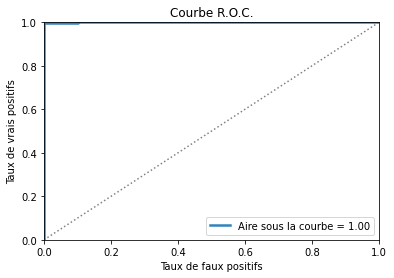

In [1530]:
#Courbe R.O.C.:
fpr, tpr, _ = roc_curve(ytest, xtest['proba'])
roc_auc = roc_auc_score(ytest, xtest['proba'])

#Graphique:
plt.title("Courbe R.O.C.")
plt.plot(fpr,
        tpr,
        color="#3182bd",
        linewidth=2.5,
        label="Aire sous la courbe = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1],color="grey", linestyle=":")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "lower right")
plt.ylabel("Taux de vrais positifs")
plt.xlabel("Taux de faux positifs")
plt.show()

La courbe de Roc permet de mesurer la performance d'un classificateur binaire.
elle représente le taux de vrais positifs (sensibilité) en fonction du taux de faux positifs (1 - spécificité) pour différents seuils de classification.
Comme avec les metrics calculées , on trouve un modèle presque parfait avec une aire sous la courbe approximée à 1.

In [1531]:
#Prediction sur des donnes inconnues:
Billet_test_df =pd.read_csv('billets_test.csv', sep=",")
print(Billet_test_df)
X_test = Billet_test_df[["height_right","margin_low","margin_up","length"]]
X_test = sm.add_constant(X_test)
Billet_test_df["proba"] = reg_log.predict(X_test)
Billet_test_df["y_pred"] = (reg_log.predict(X_test) >= 0.5).astype(int)
print(Billet_test_df[["id","proba","y_pred"]])

#Affichage des resultats:
print("\nIndentification des billets:")
for i, k in zip(Billet_test_df["y_pred"],Billet_test_df["id"]):
    if i == 1:
        print("Le billet","{}".format(k),"est vrai")
    else:
        print("Le billet","{}".format(k),"est faux")

   diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5
    id     proba  y_pred
0  A_1  0.000115       0
1  A_2  0.000015       0
2  A_3  0.000043       0
3  A_4  0.995231       1
4  A_5  0.999979       1

Indentification des billets:
Le billet A_1 est faux
Le billet A_2 est faux
Le billet A_3 est faux
Le billet A_4 est vrai
Le billet A_5 est vrai


# K means

In [1532]:
billet_scaled = preprocessing.StandardScaler().fit_transform(df.iloc[:,1:-2])
idx = ["mean", "std"]
pd.DataFrame(billet_scaled).describe().round(2).loc[idx, :]

,0,1,2,3
mean,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0


- La méthode du "coude": On représente graphiquement la relation entre le nombre de clusters et la somme des carrés internes (Within Cluster Sum of Squares (WCSS)) puis on sélectionne le nombre de clusters pour lequel le changement de WCSS commence à s'applatir.

Text(0, 0.5, 'WCSS')

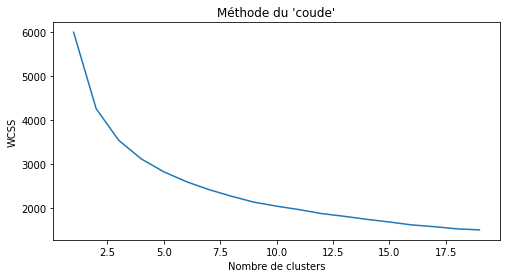

In [1533]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(billet_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 20), wcss)
plt.title("Méthode du 'coude'")
plt.xlabel("Nombre de clusters")
plt.ylabel('WCSS')

La courbe commence a s'applatir a 2.

- La méthode "Silouhette" : Le coefficient de silouhette est la différence entre la distance moyenne avec les points du même groupe (cohésion) et la distance moyenne avec les points des groupes voisins (séparation). Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. Plus il est proche de 1 plus la classification sera bonne.

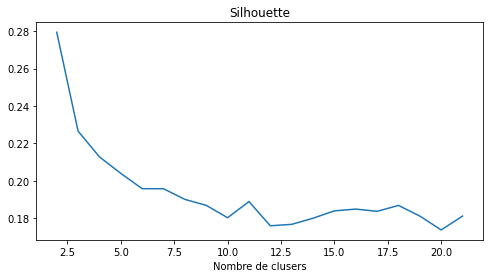

In [1534]:
res = np.arange(20,dtype="double")
for k in np.arange(20):
    km = KMeans(n_clusters=k+2)
    km.fit(billet_scaled)
    res[k] = metrics.silhouette_score(billet_scaled,km.labels_)

plt.figure(figsize=(8,4))
plt.title("Silhouette")
plt.xlabel("Nombre de clusers")
plt.plot(np.arange(2,22,1),res)

Selon la methode silhouette, le nombre de clusters idéal est de 2 également.

/Users/aqlice/goinfre/miniconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


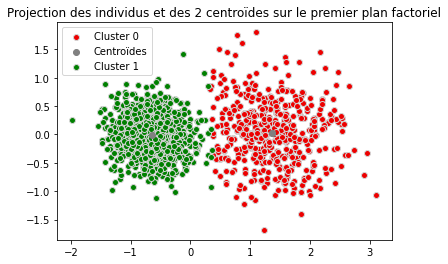

In [1535]:
n_clust = 2

#Clustering
km = KMeans(n_clusters=n_clust,random_state=42,init="k-means++")
km.fit_transform(df[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

centroids_km = km.cluster_centers_

#Clustering par projection des individus sur le premier plan factoriel:
pca_km = decomposition.PCA(n_components="mle").fit(df[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
acp_km = PCA(n_components=3).fit_transform(df[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
centroids_km_projected = pca_km.transform(centroids_km) 

#Graphique:
for couleur,k in zip(["#ed0000","#008000"],[0,1]):
    plt.scatter(acp_km[km.labels_==k,0],acp_km[km.labels_==k,1],c=couleur,edgecolors="#D3D3D3",label="Cluster {}".format(k))
    plt.legend()
    plt.scatter(centroids_km_projected[:,0],centroids_km_projected[:,1],color="grey",label="Centroïdes")
plt.title("Projection des individus et des {} centroïdes sur le premier plan factoriel".format(len(centroids_km)))
plt.show()

Text(0.5, 1.0, 'Matrice de confusion K-means\n')

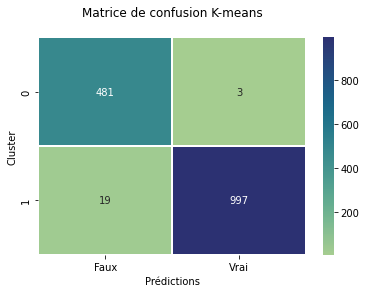

In [1536]:
#Verrification de la classification: Matrice de confusion:
km_matrix = pd.crosstab(km.labels_,df["is_genuine"])

#Graphique:
sns.heatmap(km_matrix,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette("crest", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["0","1"]
            )
plt.xlabel("Prédictions")
plt.ylabel("Cluster")
plt.title("Matrice de confusion K-means\n")

prediction legerement moins precise qu'avec la regression logistique

/Users/aqlice/goinfre/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Representation des billets')

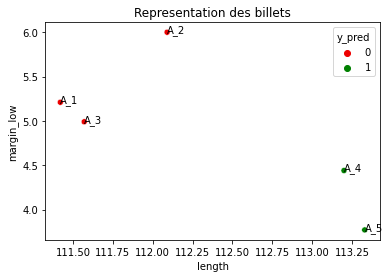

In [1537]:
#Affichage des résultats : scatterplot
couleur = ["#ed0000","#008000"]
sns.scatterplot(Billet_test_df['length'], 
                Billet_test_df['margin_low'], 
                hue=Billet_test_df['y_pred'], 
              legend='auto',palette=couleur)

#affichage de l'id des billets sur le graphique
for i in range(Billet_test_df.shape[0]):
    plt.text(x=Billet_test_df.length[i],y=Billet_test_df.margin_low[i], s=Billet_test_df.id[i], 
          fontdict=dict(color='black',size=10))


plt.title("Representation des billets")

In [1538]:
#Sauvegarde fichier Billet_df complet
df.to_csv("billet_complet.csv")